<a href="https://colab.research.google.com/github/ibe-abu-chi/python_EDA/blob/master/CKD_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn import linear_model
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test
from scipy import stats
from statsmodels.formula.api import ols
CKData = pd.read_excel('CKD_DATA.xlsx')
#pd.set_option('max_columns', None)
#pd.set_option('max_rows', None)

THIS IS A DATA ANALYSIS OF PATIENTS WITH END STAGE RENAL DISEASE(ESRD). THE AIM OF THIS ANALYSIS IS TO KNOW WHAT THE LIKELY PREDICTIVE INDEX (PARAMETER) OF ESRD IN PATIENTS AT PRESENTATION TO A HEALTH FACILITY.


In [43]:
%autosave 60

Autosaving every 60 seconds


In [ ]:
%quickref

In [ ]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%late

In [6]:
pip install lifelines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#viewing the head of the data set
CKData

,YEAR,CATEGORY_CODE,AGE,GENDER,RACE,AGE AT BIOPSY,ONSET TO BIOPSY TIME,M,E,S,...,L_MAP.1,L_CRETININE,L_eGFR,L_HEMATURIA,L_PROTEINURIA,L_UPCR,Unnamed: 104,OUTCOME,FUT,Unnamed: 107
0,2012,12305,40,FEMALE,MELAYU,30,30,1,0.0,1,...,110.0,803,5,-,-,0.67,NaN,ESRD,120,NaN
1,2012,4292,38,FEMALE,MELAYU,28,36,1,0.0,1,...,137.0,417,11,TRACE,1+,0.08,NaN,50PERC,60,NaN
2,2012,3213,38,FEMALE,MELAYU,27,9,1,NaN,1,...,146.0,59,120,1+,0,0.09,NaN,NO,48,NaN
3,2012,10911,41,FEMALE,MELAYU,31,10,0,1.0,1,...,131.0,70,96,1+,TRACE,0.02,NaN,NO,120,NaN
4,2012,7084,34,MALE,MELAYU,24,5,0,1.0,1,...,121.0,91,98,TRACE,4+,0.31,NaN,NO,120,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2020,3464,34,MALE,MELAYU,32,12,1,0.0,1,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NO,21,NaN
77,2017,4265,31,FEMALE,MELAYU,25,40,1,0.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ESRD,10,NaN
78,2019,255,38,FEMALE,MELAYU,34,44,1,0.0,1,...,116.0,95,NaN,NEG,2+,0.26,NaN,NO,18,NaN
79,2019,1996,24,FEMALE,MELAYU,21,12,1,0.0,1,...,89.0,65,NaN,1+,NEG,0.01,NaN,NO,43,NaN


In [7]:
#SELECTING THE NEEDED COLUMNS FOR THE ANALYSIS
df1 = CKData[['AGE', 'GENDER', 'B_PROTEIN', 'B_ALBUMIN',	'B_CHOLESTEROL',	'B_HEMATOCRIT', 'B_PLATELET',	'WBC',
                             'NEUTRO',	'LYMPHO',	'NLR',	'B_SBP',	'B_DBP',	'B_PP', 'B_MAP',	'HEMATURIA',	'B_creatinine',
                             'B_eGFR',	'B_UPCR',	'B_ACE',	'B_STEROID',	'B_CYTOTOXICS',	'B_AZATHIOPRINE', 'ONSET TO BIOPSY TIME', 'FUT', 'OUTCOME']]

In [ ]:
#showing last 10 observations in the data newly created data column called df1
df1.tail(10)

,AGE,GENDER,B_PROTEIN,B_ALBUMIN,B_CHOLESTEROL,B_HEMATOCRIT,B_PLATELET,WBC,NEUTRO,LYMPHO,...,B_creatinine,B_eGFR,B_UPCR,B_ACE,B_STEROID,B_CYTOTOXICS,B_AZATHIOPRINE,ONSET TO BIOPSY TIME,FUT,OUTCOME
71,24,FEMALE,72.0,35,5.76,11.7,256,12.00,8.59,2.63,...,121,55,0.29,1,0,0,0,60,6,NO
72,23,MALE,66.0,36,4.76,15.7,277,8.71,4.40,2.82,...,93,103,0.09,0,1,0,0,12,6,NO
73,37,MALE,NaN,28,6.19,14.3,336,15.80,10.83,3.84,...,378,18,0.76,1,0,0,0,12,6,ESRD
74,26,MALE,41.0,8,NaN,16.2,269,10.80,7.82,2.18,...,74,126,0.81,1,1,0,0,3,38,NO
75,26,FEMALE,71.0,34,5.76,12.1,295,8.00,5.18,1.70,...,162,39,0.31,0,0,0,0,26,21,NO
76,34,MALE,NaN,39,5.08,15.4,262,9.50,5.22,3.52,...,121,70,0.20,0,0,0,0,12,21,NO
77,31,FEMALE,54.0,22,9.65,10.9,388,7.00,4.13,2.04,...,207,29,0.94,1,1,0,0,40,10,ESRD
78,38,FEMALE,73.0,33,6.12,12.7,273,8.30,4.04,3.32,...,90,74,0.17,1,0,0,0,44,18,NO
79,24,FEMALE,NaN,38,4.28,12.8,399,9.40,6.48,2.17,...,67,115,0.18,1,0,0,0,12,43,NO
80,34,MALE,50.0,18,5.71,15.6,410,7.50,4.28,2.35,...,132,65,1.05,1,0,0,0,7,12,NO


In [8]:
#creating dummy variables for the outcome
df1['OUTCOME_d'] = np.where(df1['OUTCOME'] == 'NO', 0, (np.where(df1['OUTCOME'] == '50PERC', 1, 2)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#checking out the gender column
df1['GENDER'].describe()

count         81
unique         2
top       FEMALE
freq          60
Name: GENDER, dtype: object

In [ ]:
#checking out the haematuria column
df1['HEMATURIA'].describe()

count     81
unique     6
top       2+
freq      24
Name: HEMATURIA, dtype: object

In [ ]:
#checking out the outcome column
df1['OUTCOME'].describe()

count     81
unique     3
top       NO
freq      60
Name: OUTCOME, dtype: object

In [9]:
#viewing all columns with empty observation
df1[df1.columns[df1.isna().any()]]

,B_PROTEIN,B_CHOLESTEROL,B_SBP,B_DBP,B_PP,B_MAP,B_UPCR,ONSET TO BIOPSY TIME
0,71.0,3.78,139.0,96.0,43.0,110.0,0.11,30
1,68.0,NaN,120.0,81.0,39.0,94.0,0.40,36
2,63.0,NaN,149.0,103.0,46.0,118.0,0.26,9
3,73.0,6.97,132.0,78.0,54.0,96.0,0.14,10
4,50.0,8.65,135.0,82.0,53.0,100.0,0.63,5
...,...,...,...,...,...,...,...,...
76,NaN,5.08,144.0,88.0,56.0,107.0,0.20,12
77,54.0,9.65,144.0,107.0,37.0,119.0,0.94,40
78,73.0,6.12,138.0,83.0,55.0,101.0,0.17,44
79,NaN,4.28,129.0,69.0,60.0,89.0,0.18,12


In [10]:
#Filling out missing values with mean valuee of the column
df1[['B_PROTEIN',	'B_CHOLESTEROL',	'B_SBP',	'B_DBP', 'ONSET TO BIOPSY TIME',	'B_PP',	'B_MAP',	'B_UPCR']] = df1[
    ['B_PROTEIN', 'ONSET TO BIOPSY TIME','B_CHOLESTEROL',	'B_SBP', 'B_DBP',	'B_PP',	'B_MAP','B_UPCR']].fillna(df1[
        ['B_PROTEIN', 'B_CHOLESTEROL', 'ONSET TO BIOPSY TIME',	'B_SBP','B_DBP', 'B_PP','B_MAP',	'B_UPCR']].mean())

 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [11]:
#removing empty spaces from the columns of gender, outcome and hemturia
for col in ["GENDER", "OUTCOME", "HEMATURIA", "B_CHOLESTEROL"]:
    df1[col] = df1[col].replace("\s+-", " ", regex=True).str.strip()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#checking if any column still has empty observation
df1.isnull().any()

AGE                     False
GENDER                  False
B_PROTEIN               False
B_ALBUMIN               False
B_CHOLESTEROL            True
B_HEMATOCRIT            False
B_PLATELET              False
WBC                     False
NEUTRO                  False
LYMPHO                  False
NLR                     False
B_SBP                   False
B_DBP                   False
B_PP                    False
B_MAP                   False
HEMATURIA               False
B_creatinine            False
B_eGFR                  False
B_UPCR                  False
B_ACE                   False
B_STEROID               False
B_CYTOTOXICS            False
B_AZATHIOPRINE          False
ONSET TO BIOPSY TIME    False
FUT                     False
OUTCOME                 False
OUTCOME_d               False
dtype: bool

In [ ]:
#checking the data type
df1['B_SBP'].dtype

dtype('float64')

In [12]:
#renaming a column in the dataset
df1.rename(columns={"ONSET TO BIOPSY TIME": "BIOPSY_TIME"}, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
df1

,AGE,GENDER,B_PROTEIN,B_ALBUMIN,B_CHOLESTEROL,B_HEMATOCRIT,B_PLATELET,WBC,NEUTRO,LYMPHO,...,B_eGFR,B_UPCR,B_ACE,B_STEROID,B_CYTOTOXICS,B_AZATHIOPRINE,BIOPSY_TIME,FUT,OUTCOME,OUTCOME_d
0,40,FEMALE,71.000000,35,NaN,12.5,311,11.9,6.33,2.87,...,53,0.11,1,0,0,0,96.0,120,ESRD,2
1,38,FEMALE,68.000000,33,NaN,11.7,413,10.7,7.74,1.91,...,86,0.40,0,0,0,0,81.0,60,50PERC,1
2,38,FEMALE,63.000000,35,NaN,12.1,433,13.1,10.90,1.40,...,98,0.26,1,1,0,0,103.0,48,NO,0
3,41,FEMALE,73.000000,39,NaN,13.3,365,15.9,11.90,3.09,...,120,0.14,0,1,0,0,78.0,120,NO,0
4,34,MALE,50.000000,20,NaN,13.2,310,7.3,3.97,2.52,...,124,0.63,0,0,1,0,82.0,120,NO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,34,MALE,62.639344,39,NaN,15.4,262,9.5,5.22,3.52,...,70,0.20,0,0,0,0,88.0,21,NO,0
77,31,FEMALE,54.000000,22,NaN,10.9,388,7.0,4.13,2.04,...,29,0.94,1,1,0,0,107.0,10,ESRD,2
78,38,FEMALE,73.000000,33,NaN,12.7,273,8.3,4.04,3.32,...,74,0.17,1,0,0,0,83.0,18,NO,0
79,24,FEMALE,62.639344,38,NaN,12.8,399,9.4,6.48,2.17,...,115,0.18,1,0,0,0,69.0,43,NO,0


In [13]:
#finding unique values in my data set

pd.unique(df1[['GENDER']].values.ravel())#array(['FEMALE', 'MALE'], dtype=object)

array(['FEMALE', 'MALE'], dtype=object)

In [15]:
pd.unique(df1['B_SBP'].values.ravel()) #array(['ESRD', '50PERC', 'NO'], dtype=object)

array([ 3.78      ,  6.68921875,  6.97      ,  8.65      ,  7.19      ,
        4.67      ,  7.72      ,  4.58      ,  4.95      ,  4.62      ,
        5.06      ,  9.23      , 10.34      , 13.39      ,  5.81      ,
        7.74      ,  3.73      ,  6.1       ,  5.64      ,  5.17      ,
        4.59      ,  6.5       , 11.42      ,  9.41      ,  6.42      ,
        5.67      ,  6.41      ,  5.47      ,  4.74      ,  7.06      ,
        5.59      ,  5.77      ,  4.6       , 11.01      ,  7.57      ,
        7.71      ,  6.33      ,  8.61      ,  3.41      , 10.93      ,
        7.46      ,  3.6       ,  8.84      ,  7.4       ,  4.69      ,
        4.52      ,  7.62      ,  5.88      ,  3.7       ,  6.48      ,
       12.26      , 12.09      ,  5.76      ,  4.76      ,  6.19      ,
        5.08      ,  9.65      ,  6.12      ,  4.28      ,  5.71      ])

In [ ]:
pd.unique(df1['HEMATURIA'].values.ravel()) #array(['NEG', '2+', '3+', '1+', '5+', 'TRACE'], dtype=object)

array(['NEG', '2+', '3+', '1+', '5+', 'TRACE'], dtype=object)

In [ ]:
#cheking data type of each column
df1.dtypes

AGE                 int64
GENDER             object
B_PROTEIN         float64
B_ALBUMIN           int64
B_CHOLESTEROL      object
B_HEMATOCRIT      float64
B_PLATELET          int64
WBC               float64
NEUTRO            float64
LYMPHO            float64
NLR               float64
B_SBP             float64
B_DBP             float64
B_PP              float64
B_MAP             float64
HEMATURIA          object
B_creatinine        int64
B_eGFR              int64
B_UPCR            float64
B_ACE               int64
B_STEROID           int64
B_CYTOTOXICS        int64
B_AZATHIOPRINE      int64
BIOPSY_TIME       float64
FUT                 int64
OUTCOME            object
OUTCOME_d           int64
dtype: object

In [16]:
#dummy for esrd in the outcome column using esrd as the base value of the dummy..
df1['ESRD'] = np.where(df1['OUTCOME'] == 'ESRD', 0, 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
#dummy for 50% outcome in the outcome column using 50percent progression as the base value
df1['FIFTY_PERC'] = np.where(df1['OUTCOME'] == '50PERC', 0, 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df1['OUTCOME_d'].describe()

count    81.000000
mean      0.469136
std       0.822898
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       2.000000
Name: OUTCOME_d, dtype: float64

In [18]:
#converting the hematuria column to numeric data
conditions = [
    (df1['HEMATURIA'] == 'NEG'),
    (df1['HEMATURIA'] == 'TRACE'),
    (df1['HEMATURIA'] == '1+'),
    (df1['HEMATURIA'] == '2+'),
    (df1['HEMATURIA'] == '3+'),
    (df1['HEMATURIA'] == '5+'),
]

values = [0, 1, 2, 3, 4, 5]

df1['HEMATURIA_d'] = np.select(conditions, values)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
df1.to_excel("df1.xlsx")

In [ ]:
df1['HEMATURIA_d'].describe()

count    81.000000
mean      2.493827
std       1.388556
min       0.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: HEMATURIA_d, dtype: float64

In [20]:
#changing the gender column to dummy variables where male =1 and female = 0
df1['GENDER_d'] = np.where(df1["GENDER"] == 'FEMALE', 0 ,1)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df1['GENDER_d'].describe()

count    81.000000
mean      0.259259
std       0.440959
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: GENDER_d, dtype: float64

In [32]:
#SELECTING THE NEWLY CREATED COLUMNS FOR THE ESRD ANALYSIS
ESRD = df1[['AGE', 'GENDER_d', 'B_ALBUMIN',	'B_HEMATOCRIT', 'B_PLATELET', 'B_CHOLESTEROL',
                             'B_PP', 'B_MAP',	'HEMATURIA_d',	'B_creatinine','B_eGFR',	'B_UPCR', 'FUT', 'ESRD']]

In [33]:
FIFTY_PERC = df1[['AGE', 'GENDER_d', 'B_PROTEIN', 'B_ALBUMIN',	'B_HEMATOCRIT', 'B_PLATELET', 'B_CHOLESTEROL',
                             'NEUTRO',	'LYMPHO',	'B_PP', 'B_MAP',	'HEMATURIA_d',	'B_creatinine',
                             'B_eGFR',	'B_UPCR',	'B_ACE',	'B_STEROID',	'B_CYTOTOXICS', 'FUT', 'FIFTY_PERC']]

In [34]:
ESRD.describe()

,AGE,GENDER_d,B_ALBUMIN,B_HEMATOCRIT,B_PLATELET,B_PP,B_MAP,HEMATURIA_d,B_creatinine,B_eGFR,B_UPCR,FUT,ESRD
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,38.185185,0.259259,30.074074,12.322222,317.234568,50.850000,98.850000,2.493827,130.925926,74.296296,0.397375,32.802469,0.790123
std,10.141636,0.440959,7.575912,1.414567,80.846347,14.241752,14.821522,1.388556,86.176821,37.617963,0.269197,28.875344,0.409758
min,21.000000,0.000000,6.000000,9.600000,111.000000,26.000000,69.000000,0.000000,37.000000,15.000000,0.020000,6.000000,0.000000
25%,31.000000,0.000000,26.000000,11.400000,269.000000,40.000000,88.000000,2.000000,69.000000,39.000000,0.190000,12.000000,1.000000
50%,37.000000,0.000000,33.000000,12.200000,307.000000,49.000000,97.000000,3.000000,97.000000,77.000000,0.310000,24.000000,1.000000
75%,44.000000,1.000000,35.000000,13.200000,368.000000,58.000000,106.000000,4.000000,161.000000,107.000000,0.570000,51.000000,1.000000
max,70.000000,1.000000,42.000000,16.200000,689.000000,100.000000,145.000000,5.000000,378.000000,136.000000,1.120000,120.000000,1.000000


Text(0.5, 1.0, 'HEATMAP OF CORRELATION OF ALL VARIABLES FOR ESRD')

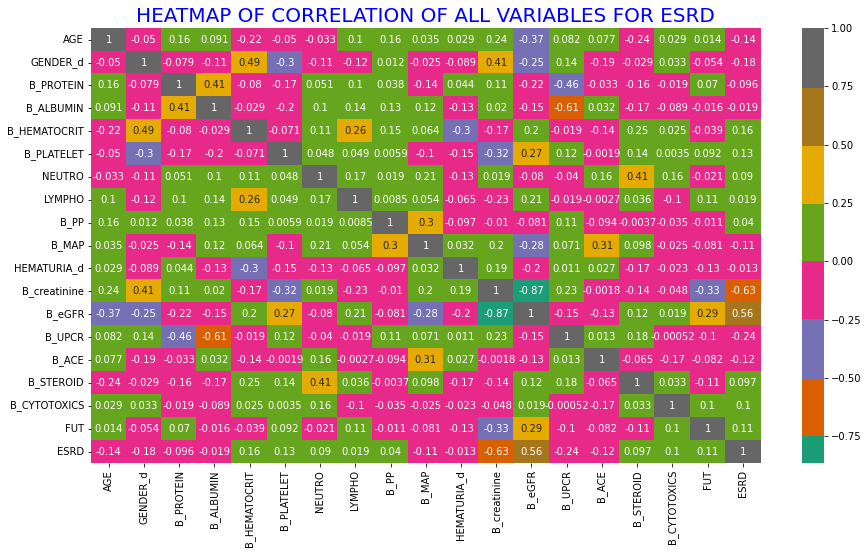

In [ ]:
#plotting the correlation of all variables in esrd data
plt.figure(figsize = (15,8))
sns.heatmap(ESRD.corr(), annot = True, center = 0, cmap = 'Dark2')
plt.title('HEATMAP OF CORRELATION OF ALL VARIABLES FOR ESRD', color='b', size=20.0)


THIS CORRELATION HEATMAP SHOWS THAT THERE IS A NEGATIVE CORRELATION BETWEEN BASELINE CREATININE AND ESRD (BASE VALUE IN THE DUMMY DATA FOR ESRD), THUS IT MEANS THAT THE HIGHER THE CREATININE, THE MORE LIKELY IT IS FOR ESRD WHILE THE HIGHER THE EGFR (POSITIVE CORRELATION), THE LESS LIKELY FOR ONE TO DEVELOP ESRD

Text(0.5, 1.0, 'HEATMAP OF CORRELATION OF ALL VARIABLES FOR ESRD')

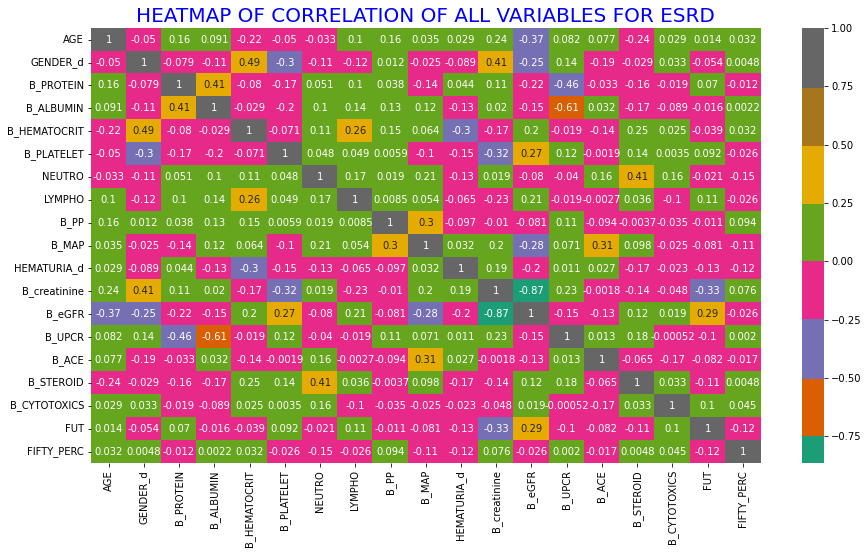

In [ ]:
#plotting the correlation of all variables 
plt.figure(figsize = (15,8))
sns.heatmap(FIFTY_PERC.corr(), annot = True, center = 0, cmap = 'Dark2')
plt.title('HEATMAP OF CORRELATION OF ALL VARIABLES FOR ESRD', color='b', size=20.0)


THIS HEATMAP DOES NOT SHOW ANY STRONG CORRELATION BETWEEN ANY PARAMETER AND 50 PERCENT PROGRESSION OF ESRD.


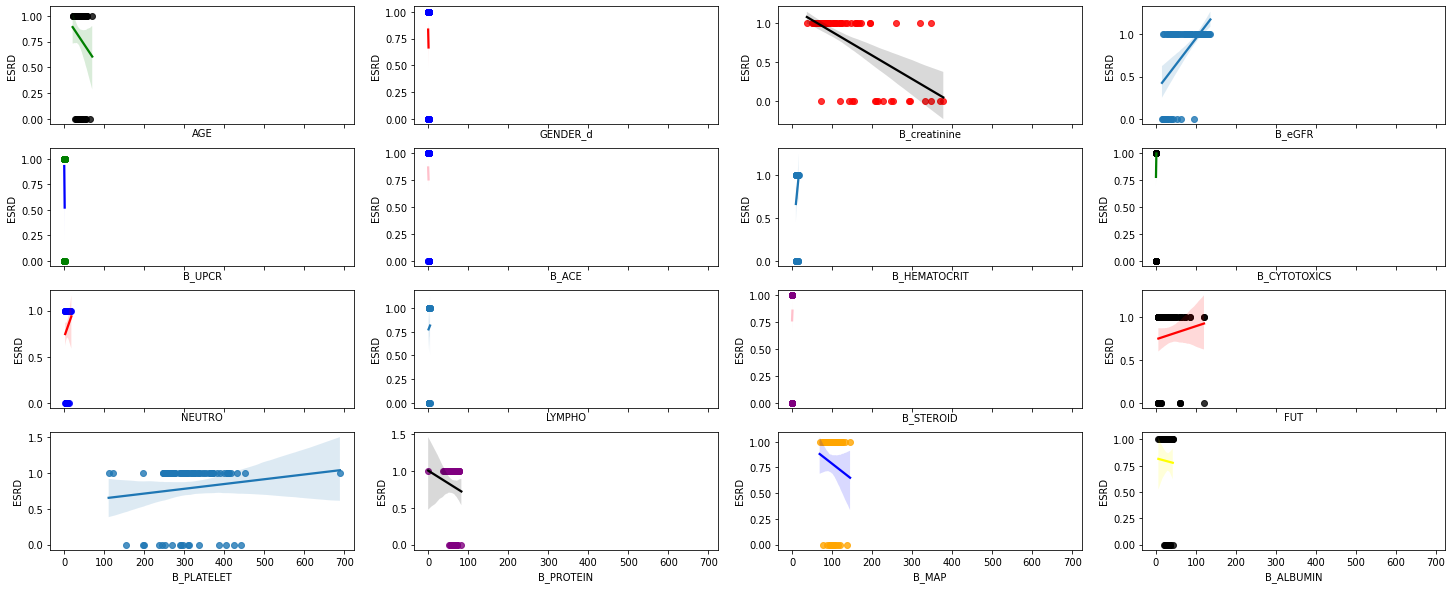

In [ ]:
#This is  regression plot of original
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(25,10), sharex=True)


sns.regplot(data = ESRD, x = 'AGE', y = 'ESRD', ax=axs[0,0],
           scatter_kws={"color": "black"}, line_kws={"color": "green"})
            
sns.regplot(data = ESRD, x = 'GENDER_d', y = 'ESRD', ax=axs[0,1],
           scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.regplot(data = ESRD, x = 'B_creatinine', y = 'ESRD', ax=axs[0,2],
           scatter_kws={"color": "red"}, line_kws={"color": "black"})
sns.regplot(data = ESRD, x = 'B_eGFR', y = 'ESRD', ax=axs[0,3])

sns.regplot(data = ESRD, x = 'B_UPCR', y = 'ESRD',ax=axs[1,0],
           scatter_kws={"color": "green"}, line_kws={"color": "blue"})
sns.regplot(data = ESRD, x = 'B_HEMATOCRIT', y = 'ESRD', ax=axs[1,2])
sns.regplot(data = ESRD, x = 'B_ACE', y = 'ESRD', ax=axs[1,1],
           scatter_kws={"color": "blue"}, line_kws={"color": "pink"})
sns.regplot(data = ESRD, x = 'B_CYTOTOXICS', y = 'ESRD', ax=axs[1,3],
           scatter_kws={"color": "black"}, line_kws={"color": "green"})
sns.regplot(data = ESRD, x = 'NEUTRO', y = 'ESRD', ax=axs[2,0],
           scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.regplot(data = ESRD, x = 'LYMPHO', y = 'ESRD', ax=axs[2,1])
sns.regplot(data = ESRD, x = 'B_STEROID', y = 'ESRD', ax=axs[2,2],
           scatter_kws={"color": "purple"}, line_kws={"color": "pink"})
sns.regplot(data = ESRD, x = 'FUT', y = 'ESRD', ax=axs[2,3],
            scatter_kws={"color": "black"}, line_kws={"color": "red"})
sns.regplot(data = ESRD, x = 'B_PLATELET', y = 'ESRD', ax=axs[3,0])
sns.regplot(data = ESRD, x = 'B_PROTEIN', y = 'ESRD', ax=axs[3,1],
           scatter_kws={"color": "purple"}, line_kws={"color": "black"})
sns.regplot(data = ESRD, x = 'B_MAP', y = 'ESRD', ax=axs[3,2],
           scatter_kws={"color": "orange"}, line_kws={"color": "blue"})
sns.regplot(data = ESRD, x = 'B_ALBUMIN', y = 'ESRD', ax=axs[3,3],
           scatter_kws={"color": "black"}, line_kws={"color": "yellow"})

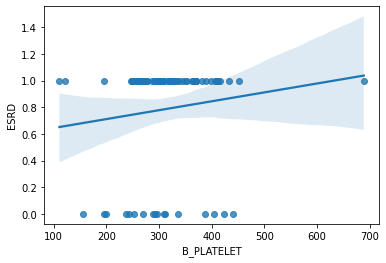

In [ ]:
sns.regplot(data = ESRD, x = 'B_PLATELET', y = 'ESRD')

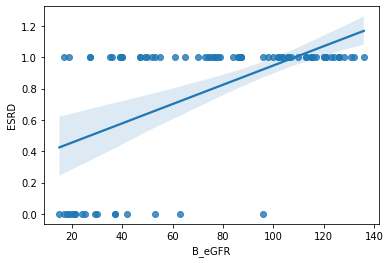

In [ ]:
sns.regplot(data = ESRD, x = 'B_eGFR', y = 'ESRD')

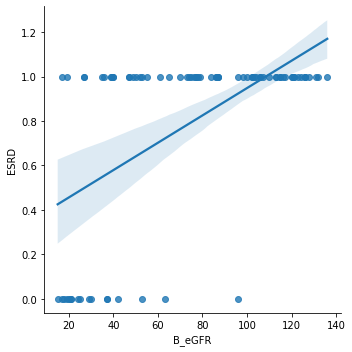

In [ ]:
sns.lmplot(data = ESRD, x = 'B_eGFR', y = 'ESRD')

THIS REGRESSION PLOT SHOWS THAT THE HIGHER THE eGFR, THE LESS LIKELY TO DEVELOP ESRD.

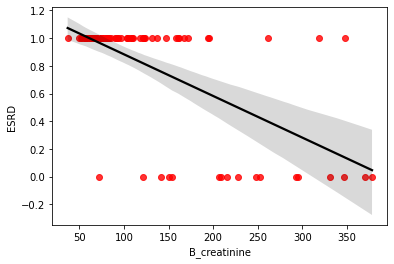

In [ ]:
sns.regplot(data = ESRD, x = 'B_creatinine', y = 'ESRD',
           scatter_kws={"color": "red"}, line_kws={"color": "black"})

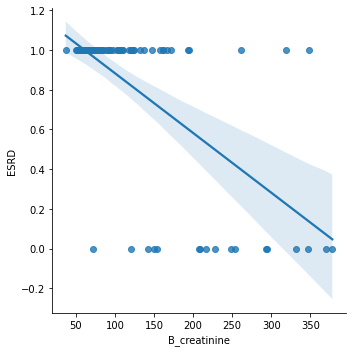

In [ ]:
sns.lmplot(data = ESRD, x = 'B_creatinine', y = 'ESRD')

THIS REGRESSION PLOT SHOWS THAT THE HIGHER THE CREATININE, THE HIGHER THE RISK OF ESRD WHICH AGREES WITH OUR CORRELATION HEATMAP

Text(0, 0.5, 'OUTCOME')

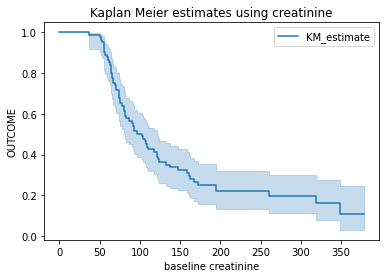

In [35]:
kmf = KaplanMeierFitter()
X = ESRD['B_creatinine']
Y = ESRD['ESRD']
kmf.fit(X, event_observed = Y)
kmf.plot()
plt.title("Kaplan Meier estimates using creatinine")
plt.xlabel("baseline creatinine")
plt.ylabel("OUTCOME")

HERE, CREATININE VALUE GREATER THAN 50 HAS AN INCREASED RISK FOR ESRD DEVELOPMENT. AT 200 WITH 20% CAHNCE WHILE VALUES GREATER THAN 350 IS ASSOCIATED WITH HIGHER RISK

Text(0, 0.5, 'OUTCOME')

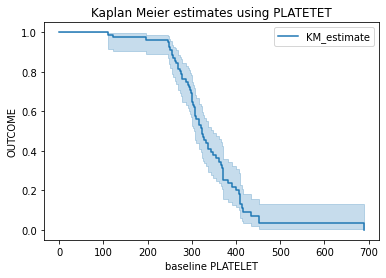

In [36]:
kmf = KaplanMeierFitter()
X = ESRD['B_PLATELET']
Y = ESRD['ESRD']
kmf.fit(X, event_observed = Y)
kmf.plot()
plt.title("Kaplan Meier estimates using PLATETET")
plt.xlabel("baseline PLATELET")
plt.ylabel("OUTCOME")

THIS SHOWS THAT PLATELET < 300 HAVE A HIGHER CHANCE OF SURVIVAL BUT GREATER THAN 300 THE PERCANTAGE FOR SURVIVAL DROPPED DRASTICALLY

Text(0, 0.5, 'OUTCOME')

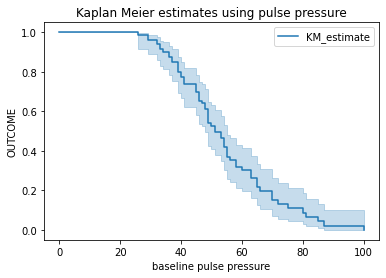

In [37]:
kmf = KaplanMeierFitter()
X = ESRD['B_PP']
Y = ESRD['ESRD']
kmf.fit(X, event_observed = Y)
kmf.plot()
plt.title("Kaplan Meier estimates using pulse pressure")
plt.xlabel("baseline pulse pressure")
plt.ylabel("OUTCOME")

PULSE PRESSURE LESS THAN 30 HAVE A HIGHER CHANCE OF SURVIVAL BUT GREATER THAN 30 THE CHANCES OF SURVIVAL DECLINES TILL ABOUT 90 WHERE SURVIVAL PERCANTAGE IS SHOWN TO BE ABOUT 0%

Text(0, 0.5, 'OUTCOME')

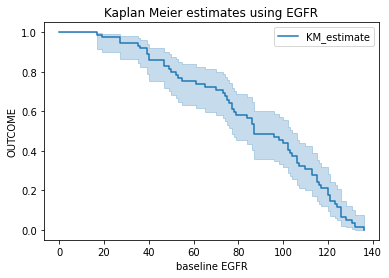

In [39]:
kmf = KaplanMeierFitter()
X = ESRD['B_eGFR']
Y = ESRD['ESRD']
kmf.fit(X, event_observed = Y)
kmf.plot()
plt.title("Kaplan Meier estimates using EGFR")
plt.xlabel("baseline EGFR")
plt.ylabel("OUTCOME")

EGFR AT 80 HAS ABOUT 60% CHANCE OF SURVIVAL

Text(0, 0.5, 'Survival')

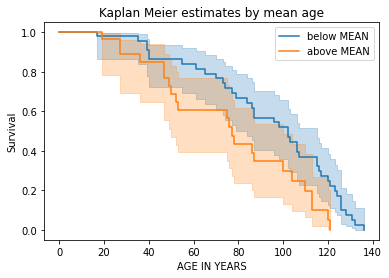

In [40]:
kmf.survival_function_
age_group = ESRD['AGE'] < np.mean(ESRD['AGE'])
ax = plt.subplot(111)
kmf.fit(X[age_group], event_observed = Y[age_group], label = 'below MEAN')
kmf.plot(ax = ax)
kmf.fit(X[~age_group], event_observed = Y[~age_group], label = 'above MEAN')
kmf.plot(ax = ax)
plt.title("Kaplan Meier estimates by mean age")
plt.xlabel("AGE IN YEARS")
plt.ylabel("Survival")


HIGHER CHANCE OF SURVIVAL IN PERSONS ABOVE MEAN AGE (38.19 YEARS) THAN THOSE BELOW MEAN AGE.

Text(0, 0.5, 'Survival')

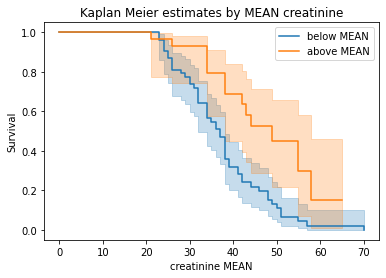

In [ ]:
kmf.survival_function_
biopsy = ESRD['B_creatinine'] < np.mean(ESRD['B_creatinine'])
ax = plt.subplot(111)
kmf.fit(X[biopsy], event_observed = Y[biopsy], label = 'below MEAN')
kmf.plot(ax = ax)
kmf.fit(X[~biopsy], event_observed = Y[~biopsy], label = 'above MEAN')
kmf.plot(ax = ax)
plt.title("Kaplan Meier estimates by MEAN creatinine")
plt.xlabel("creatinine MEAN")
plt.ylabel("Survival")

VALUES OF CREATININE ABOVE MEAN VALUE OF (130.93) HAD A SLIGHTLY BETTER CHANCE OF SURVIVAL THAN THOSE BELOW THE MEAN VALUE

Text(0, 0.5, 'Survival')

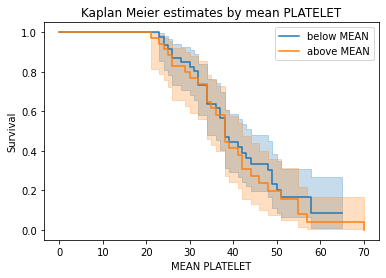

In [ ]:
kmf.survival_function_
biopsy = ESRD['B_PLATELET'] < np.mean(ESRD['B_PLATELET'])
ax = plt.subplot(111)
kmf.fit(X[biopsy], event_observed = Y[biopsy], label = 'below MEAN')
kmf.plot(ax = ax)
kmf.fit(X[~biopsy], event_observed = Y[~biopsy], label = 'above MEAN')
kmf.plot(ax = ax)
plt.title("Kaplan Meier estimates by mean PLATELET")
plt.xlabel("MEAN PLATELET")
plt.ylabel("Survival")

MEAN HERE IS 317.2 AND THERE NO MARKED DIFFERECNCE BETWEEN THE SURVIVAL OF THOSE ABOVE MEAN VALUE AND THOSE BELOW MEAN VALUE

Text(0, 0.5, 'Survival')

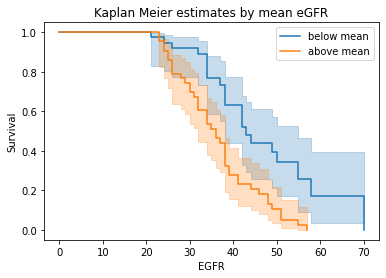

In [ ]:
kmf.survival_function_
biopsy = ESRD['B_eGFR'] < np.mean(ESRD['B_eGFR'])
ax = plt.subplot(111)
kmf.fit(X[biopsy], event_observed = Y[biopsy], label = 'below mean')
kmf.plot(ax = ax)
kmf.fit(X[~biopsy], event_observed = Y[~biopsy], label = 'above mean')
kmf.plot(ax = ax)
plt.title("Kaplan Meier estimates by mean eGFR")
plt.xlabel("EGFR")
plt.ylabel("Survival")

HERE SHOWS THAT THOSE WHO HAD BELOW MEAN VALUE OF 74.30 EGFR HAD A SIGNIFICANT BETTER SURVIVAL CHANCE THAN THOSE ABOVE THE MEAN VALUE

Text(0, 0.5, 'Survival')

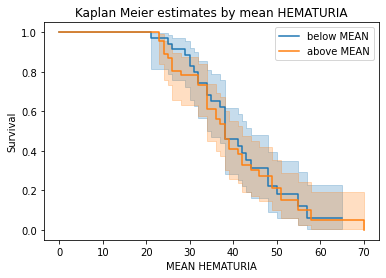

In [ ]:
kmf.survival_function_
biopsy = ESRD['HEMATURIA_d'] < np.mean(ESRD['HEMATURIA_d'])
ax = plt.subplot(111)
kmf.fit(X[biopsy], event_observed = Y[biopsy], label = 'below MEAN')
kmf.plot(ax = ax)
kmf.fit(X[~biopsy], event_observed = Y[~biopsy], label = 'above MEAN')
kmf.plot(ax = ax)
plt.title("Kaplan Meier estimates by mean HEMATURIA")
plt.xlabel("MEAN HEMATURIA")
plt.ylabel("Survival")

BELOW AND ABOVE MEAN VALUE FOR HEMATURIA SHOWED NO SIGNIFICANT SURVIVAL DIFFERENCE

Text(0, 0.5, 'Survival')

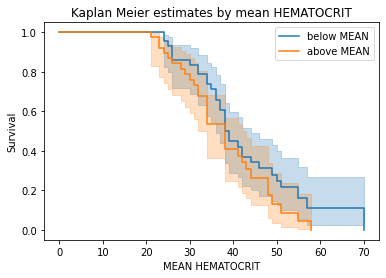

In [ ]:
kmf.survival_function_
biopsy = ESRD['B_HEMATOCRIT'] < np.mean(ESRD['B_HEMATOCRIT'])
ax = plt.subplot(111)
kmf.fit(X[biopsy], event_observed = Y[biopsy], label = 'below MEAN')
kmf.plot(ax = ax)
kmf.fit(X[~biopsy], event_observed = Y[~biopsy], label = 'above MEAN')
kmf.plot(ax = ax)
plt.title("Kaplan Meier estimates by mean HEMATOCRIT")
plt.xlabel("MEAN HEMATOCRIT")
plt.ylabel("Survival")

HEMATOCRIT BELOW 12.23 SHOWED A SLIGHLTY BETTER CHANCE OF SURVIVAL THAN ABOVE THE MEAN VALUE

Text(0.5, 1.0, 'Survival Function based on CREATININE')

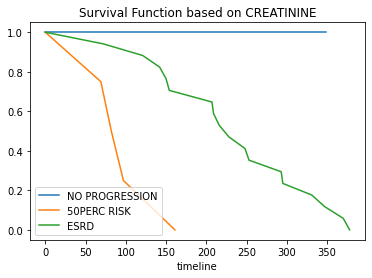

In [41]:

# Define the low and high satisfaction
High = (df1.OUTCOME_d == 2) 

Med  = (df1.OUTCOME_d == 1)
 
Low = (df1.OUTCOME_d == 0) 
 
# Plot the survival function
ax = plt.subplot()
 
kmf = KaplanMeierFitter()
kmf.fit(durations=df1[Low].B_creatinine,
event_observed=df1[Low].OUTCOME_d, label='NO PROGRESSION')
kmf.survival_function_.plot(ax=ax)

kmf.fit(durations=df1[Med].B_creatinine, event_observed=df1[Med].OUTCOME_d, label='50PERC RISK')
kmf.survival_function_.plot(ax=ax)
 
kmf.fit(durations=df1[High].B_creatinine, event_observed=df1[High].OUTCOME_d, label='ESRD')
kmf.survival_function_.plot(ax=ax)
 
plt.title('Survival Function based on CREATININE')

HERE, THERE IS A HIGHER CHANCE OF COMING DOWN WITH 50 PERCENT PROGRESSION THAN DEVELOPING THE FULL ESRD. WHILE 50 PERCENT PROGRESSION SHOWS VALUE AT 150 TO BE ABOUT 8% SURVIVAL, THE ESRD AT SAME VALUE OF 150 SHOWS ABOUT 75% SURVIVAL.





Text(0.5, 1.0, 'Survival Function based on eGFR')

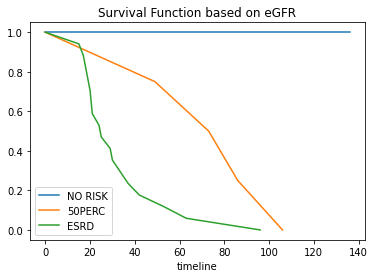

In [42]:
# Define the low and high satisfaction
High = (df1.OUTCOME_d == 2) 

Med  = (df1.OUTCOME_d == 1)
 
Low = (df1.OUTCOME_d == 0) 
 
# Plot the survival function
ax = plt.subplot()

kmf = KaplanMeierFitter()
kmf.fit(durations=df1[Low].B_eGFR,
event_observed=df1[Low].OUTCOME_d, label='NO RISK')
kmf.survival_function_.plot(ax=ax)

kmf.fit(durations=df1[Med].B_eGFR, event_observed=df1[Med].OUTCOME_d, label='50PERC')
kmf.survival_function_.plot(ax=ax)
 
kmf.fit(durations=df1[High].B_eGFR, event_observed=df1[High].OUTCOME_d, label='ESRD')
kmf.survival_function_.plot(ax=ax)
 
plt.title('Survival Function based on eGFR')

WITH EGFR AT 40, THERE IS 20% CHANCE OF ESRD SURVIVAL WHILE 50 PERCENT PROGRESSION AT SAME VALUE OF 40 IS ABOUT 4 TIMES OF ESRD SURVIVAL AT 80%. THUS, ITS LONGER THAN 4 TIMES OF 50 PERCENT DISEASE PROGRESSION TO MANIFEST AS FULL DISEASE ENTITY.

Text(0.5, 1.0, 'Survival Function based on age')

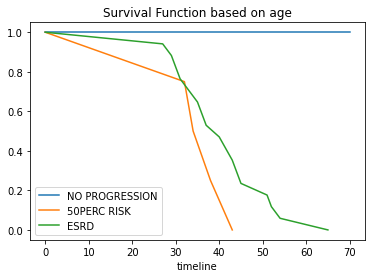

In [ ]:
# Define the low and high satisfaction
High = (df1.OUTCOME_d == 2) 

Med  = (df1.OUTCOME_d == 1)
 
Low = (df1.OUTCOME_d == 0) 
 
# Plot the survival function
ax = plt.subplot()
 
kmf = KaplanMeierFitter()
kmf.fit(durations=df1[Low].AGE,
event_observed=df1[Low].OUTCOME_d, label='NO PROGRESSION')
kmf.survival_function_.plot(ax=ax)

kmf.fit(durations=df1[Med].AGE, event_observed=df1[Med].OUTCOME_d, label='50PERC RISK')
kmf.survival_function_.plot(ax=ax)
 
kmf.fit(durations=df1[High].AGE, event_observed=df1[High].OUTCOME_d, label='ESRD')
kmf.survival_function_.plot(ax=ax)
 
plt.title('Survival Function based on age')

AT ABOUT 34 YEARS OF AGE, THE SURVIVAL OF ESRD & 50 PERCENT PROGRESSION SEEM TO BE THE SAME AT ABOUT 70%.

Text(0.5, 1.0, 'Survival Function based on PLATELET')

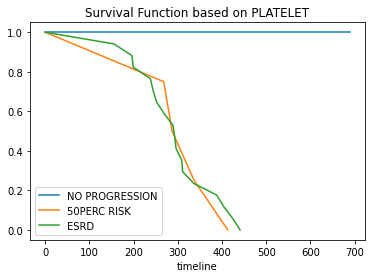

In [ ]:
# Define the low and high satisfaction
High = (df1.OUTCOME_d == 2) 

Med  = (df1.OUTCOME_d == 1)
 
Low = (df1.OUTCOME_d == 0) 
 
# Plot the survival function
ax = plt.subplot()
 
kmf = KaplanMeierFitter()
kmf.fit(durations=df1[Low].B_PLATELET,
event_observed=df1[Low].OUTCOME_d, label='NO PROGRESSION')
kmf.survival_function_.plot(ax=ax)

kmf.fit(durations=df1[Med].B_PLATELET, event_observed=df1[Med].OUTCOME_d, label='50PERC RISK')
kmf.survival_function_.plot(ax=ax)
 
kmf.fit(durations=df1[High].B_PLATELET, event_observed=df1[High].OUTCOME_d, label='ESRD')
kmf.survival_function_.plot(ax=ax)
 
plt.title('Survival Function based on PLATELET')

HERE, 50 PERCENT PROGRESSION AND ESRD SHOW ALMOST SAME CHANCE OF SURVIVAL AND BEYOND PLATELET OF 420, THE CHNACE OF SURVIVAL IS ESTIMATED TO BE ZERO

Text(0.5, 1.0, 'Survival Function based on HEMATOCRIT')

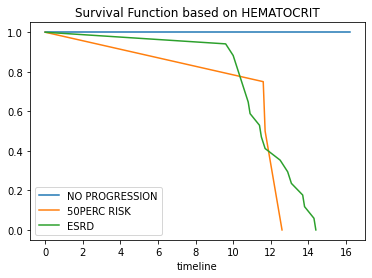

In [ ]:

# Define the low and high satisfaction
High = (df1.OUTCOME_d == 2) 

Med  = (df1.OUTCOME_d == 1)
 
Low = (df1.OUTCOME_d == 0) 
 
# Plot the survival function
ax = plt.subplot()
 
kmf = KaplanMeierFitter()
kmf.fit(durations=df1[Low].B_HEMATOCRIT,
event_observed=df1[Low].OUTCOME_d, label='NO PROGRESSION')
kmf.survival_function_.plot(ax=ax)

kmf.fit(durations=df1[Med].B_HEMATOCRIT, event_observed=df1[Med].OUTCOME_d, label='50PERC RISK')
kmf.survival_function_.plot(ax=ax)
 
kmf.fit(durations=df1[High].B_HEMATOCRIT, event_observed=df1[High].OUTCOME_d, label='ESRD')
kmf.survival_function_.plot(ax=ax)
 
plt.title('Survival Function based on HEMATOCRIT')

WITH HEMATOCRIT OF 4.2, THERE IS 90% SURVIVAL FOR THOSE WHO HAD 50 PERCENT DISEASE PROGRESSION WHILE WHILE HEMATOCRIT FOR SAME SURVIVAL RATE IS ABOUT 11 FOR ESRD

Text(0.5, 1.0, 'Survival Function based on HEMATURIA')

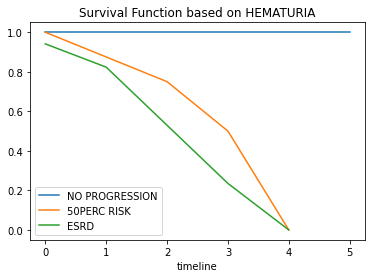

In [ ]:

# Define the low and high satisfaction
High = (df1.OUTCOME_d == 2) 

Med  = (df1.OUTCOME_d == 1)
 
Low = (df1.OUTCOME_d == 0) 
 
# Plot the survival function
ax = plt.subplot()
 
kmf = KaplanMeierFitter()
kmf.fit(durations=df1[Low].HEMATURIA_d,
event_observed=df1[Low].OUTCOME_d, label='NO PROGRESSION')
kmf.survival_function_.plot(ax=ax)

kmf.fit(durations=df1[Med].HEMATURIA_d, event_observed=df1[Med].OUTCOME_d, label='50PERC RISK')
kmf.survival_function_.plot(ax=ax)
 
kmf.fit(durations=df1[High].HEMATURIA_d, event_observed=df1[High].OUTCOME_d, label='ESRD')
kmf.survival_function_.plot(ax=ax)
 
plt.title('Survival Function based on HEMATURIA')

THERE IS A HIGHER CHANCE OF ESRD WITH HEMATURIA AT ANY VALUE THAN GHAVING 50 PERCENT OF PROGRESSION WHILE AT HEMATURIA OF 3+++ OR MORE, THERE IS NO EVIDENCE OF SURVIVAL FOR BOTH GROUPS EXCEPT THOSE WHO DID NOT PROGRESS.

In [44]:

## My objective here is to introduce you to the implementation of the model.Thus taking subset of the columns to train the model.
## Only using the subset of the columns present in the original data
df_r= df1.loc[:,['FUT', 'OUTCOME_d', 'AGE','GENDER_d', 'B_PROTEIN', 'B_ALBUMIN', 'B_HEMATOCRIT', 'B_PLATELET', 'WBC', 'NEUTRO', 'LYMPHO', 'B_PP', 'B_MAP','B_PLATELET','HEMATURIA_d', 'B_creatinine', 'B_UPCR', 'B_ACE', 'B_STEROID','BIOPSY_TIME', 'B_CYTOTOXICS', 'B_eGFR']]
df_r.head() ## have a look at the data

,FUT,OUTCOME_d,AGE,GENDER_d,B_PROTEIN,B_ALBUMIN,B_HEMATOCRIT,B_PLATELET,WBC,NEUTRO,...,B_MAP,B_PLATELET,HEMATURIA_d,B_creatinine,B_UPCR,B_ACE,B_STEROID,BIOPSY_TIME,B_CYTOTOXICS,B_eGFR
0,120,2,40,0,71.0,35,12.5,311,11.9,6.33,...,110.0,311,0,121,0.11,1,0,96.0,0,53
1,60,1,38,0,68.0,33,11.7,413,10.7,7.74,...,94.0,413,3,82,0.40,0,0,81.0,0,86
2,48,0,38,0,63.0,35,12.1,433,13.1,10.90,...,118.0,433,0,74,0.26,1,1,103.0,0,98
3,120,0,41,0,73.0,39,13.3,365,15.9,11.90,...,96.0,365,0,59,0.14,0,1,78.0,0,120
4,120,0,34,1,50.0,20,13.2,310,7.3,3.97,...,100.0,310,0,76,0.63,0,0,82.0,1,124


In [47]:
## Create dummy variables
df_d = pd.get_dummies(df_r, drop_first=True)
df_d

,FUT,OUTCOME_d,AGE,GENDER_d,B_PROTEIN,B_ALBUMIN,B_HEMATOCRIT,B_PLATELET,WBC,NEUTRO,...,B_MAP,B_PLATELET,HEMATURIA_d,B_creatinine,B_UPCR,B_ACE,B_STEROID,BIOPSY_TIME,B_CYTOTOXICS,B_eGFR
0,120,2,40,0,71.000000,35,12.5,311,11.9,6.33,...,110.0,311,0,121,0.11,1,0,96.0,0,53
1,60,1,38,0,68.000000,33,11.7,413,10.7,7.74,...,94.0,413,3,82,0.40,0,0,81.0,0,86
2,48,0,38,0,63.000000,35,12.1,433,13.1,10.90,...,118.0,433,0,74,0.26,1,1,103.0,0,98
3,120,0,41,0,73.000000,39,13.3,365,15.9,11.90,...,96.0,365,0,59,0.14,0,1,78.0,0,120
4,120,0,34,1,50.000000,20,13.2,310,7.3,3.97,...,100.0,310,0,76,0.63,0,0,82.0,1,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,21,0,34,1,62.639344,39,15.4,262,9.5,5.22,...,107.0,262,3,121,0.20,0,0,88.0,0,70
77,10,2,31,0,54.000000,22,10.9,388,7.0,4.13,...,119.0,388,3,207,0.94,1,1,107.0,0,29
78,18,0,38,0,73.000000,33,12.7,273,8.3,4.04,...,101.0,273,0,90,0.17,1,0,83.0,0,74
79,43,0,24,0,62.639344,38,12.8,399,9.4,6.48,...,89.0,399,3,67,0.18,1,0,69.0,0,115


In [48]:
df_b = ESRD[['ESRD', 'B_creatinine']]
  
# Taking only the selected two attributes from the dataset
df_b.columns = ['ESRD', 'B_creatinine']
#display the first 5 rows
df_b

,ESRD,B_creatinine
0,0,121
1,1,82
2,1,74
3,1,59
4,1,76
...,...,...
76,1,121
77,0,207
78,1,90
79,1,67


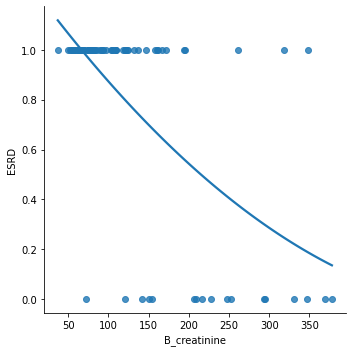

In [49]:

#plotting the Scatter plot to check relationship
sns.lmplot(y ="ESRD", x ="B_creatinine", data = df_b, order = 2, ci = None)

HERE, ITS OBVIOUS THAT THE HIGHER THE CREATININE, THE MORE LIKELY TTO COME DOWN WITH ESRD 
N.B: DUMMY VARIABLE CREATED EARLIER USED ESRD AS THE BASE VALUE

In [50]:
df_EGFR = ESRD[['ESRD', 'B_eGFR']]
  
# Taking only the selected two attributes from the dataset
df_EGFR.columns = ['ESRD', 'B_eGFR']

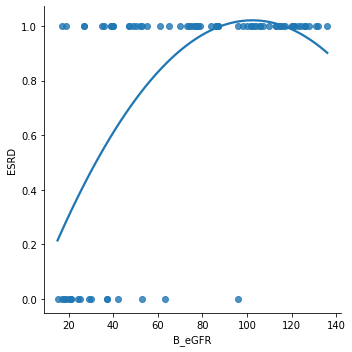

In [52]:
#plotting the Scatter plot to check relationship
sns.lmplot(y ="ESRD", x ="B_eGFR", data = df_EGFR, order = 2, ci = None)

THE HIGHER THE EGFR, THE LESS LIKELY IT IS TO COME DOWN WITH ESRD BUT  BEYOND THE TRESHOLD OF 110, THERE IS A REVERSE TREND

In [54]:
# building model for regression 
mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')
Columns = ['GENDER_d', 'B_ALBUMIN','B_HEMATOCRIT', 'B_PLATELET', 'B_PP', 'B_MAP', 'HEMATURIA_d', 'B_creatinine', 'B_eGFR']
X = mean.fit_transform(ESRD[Columns])
df_X = pd.DataFrame(X,
                    columns = Columns)
keep = ['ESRD']
df_keepcolumn = ESRD[keep]
df = pd.concat([df_keepcolumn, df_X], axis = 1)
df = df.dropna() 
df.isnull().sum()
df.shape

(81, 10)

In [67]:
X = np.array(df_b['B_creatinine']).reshape(-1, 1)
y = np.array(df_b['ESRD']).reshape(-1, 1)
  
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
# since each dataframe contains only one column
df_b.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
  
# Splitting the data into training and testing data
regr = LinearRegression()
  
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


0.17650382776940277

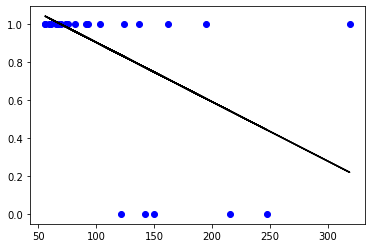

In [68]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')


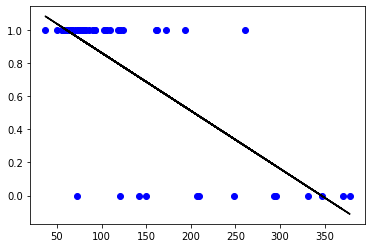

In [63]:
y_pred = regr.predict(X_train)
plt.scatter(X_train, y_train, color ='b')
plt.plot(X_train, y_pred, color ='k')

In [64]:
X = np.array(df_EGFR['B_eGFR']).reshape(-1, 1)
y = np.array(df_EGFR['ESRD']).reshape(-1, 1)
  
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
# since each dataframe contains only one column
df_b.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
  
# Splitting the data into training and testing data
regr = LinearRegression()
  
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


0.255057026396886

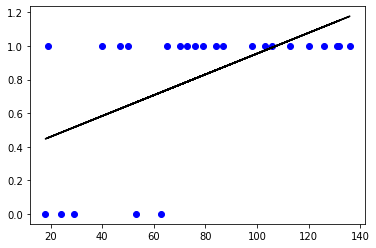

In [ ]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')

In [71]:
#At last, we check the performance of the Linear Regression model with help of evaluation metrics. 
#For Regression algorithms we widely use mean_absolute_error, and mean_squared_error metrics to check the model performance. 
from sklearn.metrics import mean_absolute_error,mean_squared_error
  
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.22787415742027295
MSE: 0.1317593875568956
RMSE: 0.3629867594787661


In [73]:

  
# Creating independent and dependent variables.
X, y = ESRD['B_creatinine'], ESRD['ESRD']
  
# Splitting the data into training set and test set.
X_train, X_test, y_train, y_test = X[:60], X[60:], y[:60], y[60:]
  
"""
The training set is already shuffled for us, which is good as this guarantees that all
cross-validation folds will be similar.
"""
  
# Training a binary classifier.
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)
  
#Building a dumb classifier that just classifies every single image in the “not-5” class.

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
  
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([1., 1., 1.])

In [74]:
never_5_clf

Never5Classifier()

In [ ]:
# Creating some predictions.
y_train_pred = cross_val_predict(never_5_clf, X_train, y_train_5, cv=3)

# Constructing the confusion matrix.
confusion_matrix(y_train_5, y_train_pred)

array([[60]])

In [ ]:
# Finding precision and recall
precision_score(y_train_5, y_train_pred)
recall_score(y_train_5, y_train_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [ ]:
# To compute the F1 score, simply call the f1_score() function:
f1_score(y_train_5, y_train_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


0.0

In [ ]:
X = df1[['AGE', 'GENDER_d', 'B_PROTEIN', 'B_ALBUMIN',
       'B_HEMATOCRIT', 'B_PLATELET', 'WBC', 'NEUTRO', 'LYMPHO', 'BIOPSY_TIME', 'B_PP', 'B_MAP', 'HEMATURIA_d', 'B_creatinine', 'B_eGFR','FUT']]
y = df1['ESRD']

In [78]:


x = df_X
y = ESRD['ESRD']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 0.8650632333057979
Coefficients: 
 [ 0.09511714  0.00108515  0.00546196 -0.00018446  0.0011803   0.00046474
  0.04199183 -0.00311251  0.00075116]
                            OLS Regression Results                            
Dep. Variable:                   ESRD   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     5.968
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           3.50e-06
Time:                        20:15:26   Log-Likelihood:                -19.348
No. Observations:                  81   AIC:                             58.70
Df Residuals:                      71   BIC:                             82.64
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


 
THE PARAMATERS IN THE MODEL SHOWS THAT THERE IS MULTICOLLINEARITY IN THE DATA.

In [80]:
model_lin = sm.OLS.from_formula("ESRD ~ B_creatinine", data=df1)
result_lin = model_lin.fit()
print(result_lin.summary())

                            OLS Regression Results                            
Dep. Variable:                   ESRD   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     52.83
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           2.28e-10
Time:                        20:18:47   Log-Likelihood:                -21.426
No. Observations:                  81   AIC:                             46.85
Df Residuals:                      79   BIC:                             51.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.1842      0.065     18.278   

THIS A GOOD MODEL SINCE THERE IS NO MULTICOLINEARITY, THIS MODEL IS STATISTICALLY SIGNIFICANT SINCE OUR P_VALUE IS O.O3 WHICH IS LESS THAN ALPH (0.05) WITH A NEGATIVE COEFFICIENT WHICH IMPLIES THAT THERE IS A STRONG CORRELATION WITH THE DISEASE ENTITY AND BASELINE CREATININE.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


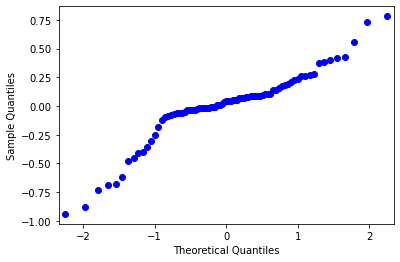

In [81]:
#plotting residual
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
res = model.resid
 
fig = sm.qqplot(res)

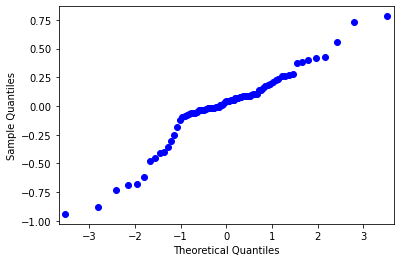

In [82]:
fig = sm.qqplot(res, stats.t, distargs=(4,))